#The generic format for get REST requests

This uses the requests library which may need to be installed in your local environment using pip 

In [ ]:
import requests                                 # To use request package in current program 
import pandas as pd
import json
import uuid
import time 
import numpy as np

url = 'https://jsonplaceholder.typicode.com/todos/1' 
response = requests.get(url)        # To execute get request 
print(response.status_code)     # To print http response code  
print(response.text)            # To print formatted JSON response





200
{
  "userId": 1,
  "id": 1,
  "title": "delectus aut autem",
  "completed": false
}


#Get data from Lumatik API

Import data

In [ ]:
dataURL = 'http://sturdy-apricot-305816.ew.r.appspot.com/Data/'
response = requests.get(dataURL)        # To execute get request 
print(response.status_code)     # To print http response code  
data = response.json()
                  # To print formatted JSON response


200


Convert data to pandas dataframe 

In [ ]:
dfdata = pd.DataFrame.from_records(data)
dfdata

,DataID,Writetime,Rval,Gval,Bval,UVAval,UVBval,VitDval,UserID,DeviceID
0,366ff60e-802e-4501-beb9-7e31e868a0ce,None,123,12,43,213,43,32,432,12
1,8730b9b9-5f85-4ce4-acc1-760914f3242c,None,123,123,123,123,123,123,123,123
2,8e483899-f8be-4363-b6f3-8b029f913015,None,681,933,234,659,127,654,1,1


In [ ]:
data[1]

{'Bval': 234,
 'DataID': '10b41bd5-ad8f-4d61-a0d7-476a5280c5ac',
 'DeviceID': 234,
 'Gval': 234,
 'Rval': 2342,
 'UVAval': 234,
 'UVBval': 234,
 'UserID': 234,
 'VitDval': 234,
 'writetime': None}

#Write data to Lumatik API 



create single example dataset

In [ ]:


examplejson = {'Bval': 234,
 'DeviceID': 1, #leave below 50
 'Gval': np.random.randint(0,1000),
 'Rval': np.random.randint(0,1000),
 'UVAval': np.random.randint(0,1000),
 'UVBval': np.random.randint(0,1000),
 'UserID':1, #leave below 50
 'VitDval': np.random.randint(0,1000),
 'Writetime': int(time.time())}

print (examplejson)



{'Bval': 234, 'DeviceID': 1, 'Gval': 585, 'Rval': 651, 'UVAval': 510, 'UVBval': 218, 'UserID': 1, 'VitDval': 15, 'Writetime': 1615917012}


Post data to API

In [ ]:
dataIN = requests.post('http://sturdy-apricot-305816.ew.r.appspot.com/Data/', json = examplejson)
print(dataIN.text )

{"DataID":"9e2b5de2-6f11-4d36-99b9-82e12ca8bef4","Writetime":1615917012,"Rval":651,"Gval":585,"Bval":234,"UVAval":510,"UVBval":218,"VitDval":15,"UserID":1,"DeviceID":1}


Create Multiple test data

In [ ]:

###WRITE DATA#####


starttime = int(time.time())
no_entries = 20 #max 200 plz
time_interval = 5  #nothing too huge 

UserID = 4 #keep below 50


for i in range(no_entries):
  examplejson = {'Bval': 234,
 'DeviceID': 1, #leave below 50
 'Gval': np.random.randint(0,1000),
 'Rval': np.random.randint(0,1000),
 'UVAval': np.random.randint(0,1000),
 'UVBval': np.random.randint(0,1000),
 'UserID': UserID, #leave below 50
 'VitDval': np.random.randint(0,1000),
 'Writetime': starttime + i*time_interval}

  dataIN = requests.post('http://sturdy-apricot-305816.ew.r.appspot.com/Data/', json = examplejson)




In [ ]:
###### CHECK WRITE ######


dataURL = 'http://sturdy-apricot-305816.ew.r.appspot.com/Data'
response = requests.get(dataURL)        # To execute get request 
print(response.status_code)     # To print http response code  
data = response.json()
dfdata = pd.DataFrame.from_records(data)
dfdata



200


,DataID,Writetime,Rval,Gval,Bval,UVAval,UVBval,VitDval,UserID,DeviceID
0,b4b4accc-0432-4c32-961c-eff4b0863150,1615917057,677,708,234,854,494,537,5,1
1,17694e51-e7c4-4b32-b2a0-30910c515030,1615917062,557,155,234,194,740,968,5,1
2,059395da-f650-4d02-a845-f28065cafd63,1615917072,444,982,234,949,475,557,5,1
3,77af4a03-4b4f-42e5-b0ad-7d4befd9f22e,1615917077,520,857,234,226,288,380,5,1
4,12ad90c6-6f88-45d3-96b8-1bb155dbb16a,1615917082,886,306,234,499,544,418,5,1
5,b4bdf31e-4738-4cb3-819b-8408945b21b1,1615917087,761,446,234,34,443,914,5,1
6,a6f8f488-cf08-4e92-af1a-08b2de34ddde,1615917097,376,976,234,91,915,376,5,1
7,1572638e-3d98-4ab1-85c1-a8421c1fa2dd,1615917112,203,35,234,462,233,74,5,1
8,673ee100-51fb-4fde-a038-8ba28727b02e,1615917132,875,636,234,809,993,51,5,1
9,a888f1ec-7be9-4674-b829-f104cc86dee0,1615917137,801,302,234,455,656,476,5,1


#Visualise

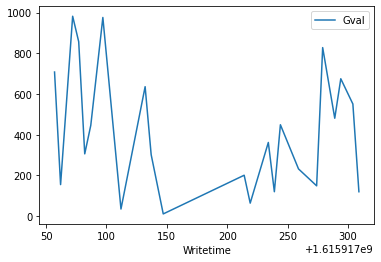

In [ ]:
dfdata.plot('Writetime','Gval')